# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [188]:
for i in range(0, n_classes):
    print("Number of training examples for class {}: {}".format(i, np.sum(y_valid==i)))

Number of training examples for class 0: 30
Number of training examples for class 1: 240
Number of training examples for class 2: 240
Number of training examples for class 3: 150
Number of training examples for class 4: 210
Number of training examples for class 5: 210
Number of training examples for class 6: 60
Number of training examples for class 7: 150
Number of training examples for class 8: 150
Number of training examples for class 9: 150
Number of training examples for class 10: 210
Number of training examples for class 11: 150
Number of training examples for class 12: 210
Number of training examples for class 13: 240
Number of training examples for class 14: 90
Number of training examples for class 15: 90
Number of training examples for class 16: 60
Number of training examples for class 17: 120
Number of training examples for class 18: 120
Number of training examples for class 19: 30
Number of training examples for class 20: 60
Number of training examples for class 21: 60
Number

'Speed limit (30km/h)'

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

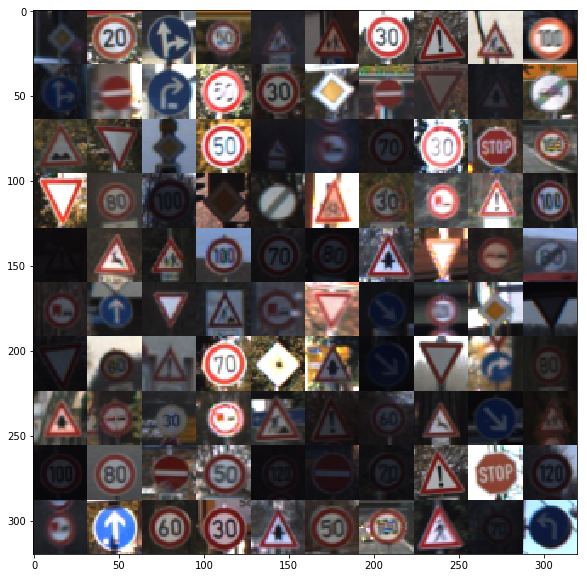

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

# Visualizations will be shown in the notebook.
%matplotlib inline

def square_grid(images):
    """
    Compacts images into a grid of 10x10 images.
    :param images: a list of 100 images.
    :return: A single image that contains the 10x10 grid. 
    """
    mode = "RGB"
    images_grid = np.reshape(images, (10, 10, 32, 32, 3))
    
    grid_image = Image.new(mode, (32*10, 32*10))
    
    for i, all_images in enumerate(images_grid):
        for j, image in enumerate(all_images):
            temp = Image.fromarray(image, mode)
            grid_image.paste(temp, (i*32, j * 32))
    
    return grid_image

rs_X_train = [X_train[i] for i in random.sample(range(len(X_train)), 100)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(square_grid(rs_X_train))

plt.show()

The visualization indicates that the input data was not randomized; I will randomize the samples during training.

In [4]:
# Next step is to see how the labels for the classes are being displayed. These labels can be anything, and I might have to process them
# to make them useful for the ML system.

print("There are {} labels, with min value of {} and max value of {}".format(len(set(y_train)), min(y_train), max(y_train)))

There are 43 labels, with min value of 0 and max value of 42


Similarly, we will need to do some other type of pre-processing prior to the training. In this case, we need to transform the labels to a on-hot vector (done in tensorflow).

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# This step is not really needed, since I will be shuffling the data before every training iteration.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# Start with data normalization.
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm = normalize(X_test)

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [5]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

def conv_maxpool(x, n_outputs, size, strides, pool_size, pool_strides):
    """
    Apply a conv2d, then activation, then max pooling to x.
    """
    x_shape = x.get_shape().as_list()
    W = tf.Variable(tf.truncated_normal([*size, x_shape[-1], n_outputs], stddev=0.1))
    b = tf.Variable(tf.zeros(n_outputs))
    
    x = tf.nn.conv2d(x, W, [1, *strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=[1, *pool_size, 1], strides=[1, *pool_strides, 1], padding="SAME")
    
    return x

def flatten(x):
    return tf.reshape(x, [-1, np.prod(x.get_shape().as_list()[1:])])

def fully_connected(x, n_outputs):
    x_shape = x.get_shape().as_list()
    W = tf.Variable(tf.truncated_normal([x_shape[1], n_outputs], stddev=0.1))
    b = tf.Variable(tf.zeros(n_outputs))
    x = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(x)

def output(x, n_classes):
    x_shape = x.get_shape().as_list()
    W = tf.Variable(tf.truncated_normal([x_shape[1], n_classes], stddev=0.1))
    b = tf.Variable(tf.zeros(n_classes))
    x = tf.add(tf.matmul(x, W), b)
    return x

def batch_normalization(x, n_outputs):
    x = tf.layers.conv2d(x, n_outputs, 5, 2, padding='same')
    return tf.layers.batch_normalization(x, training=True)

In [6]:
def conv_net(x, keep_prob):
    # Applying 2 layers of convolution, activation and max pool layers.
    # First filter has a depth of 32.
    x = conv_maxpool(x, 32, (2,2), (1,1), (2,2), (2,2))
    x = conv_maxpool(x, 64, (4,4), (1,1), (2,2), (2,2))
    
    x = flatten(x)
    
    x = fully_connected(x, 256)
    x = tf.nn.dropout(x, keep_prob)
    x = fully_connected(x, 128)
    x = tf.nn.dropout(x, keep_prob)
    
    return output(x, n_classes)
    

In [12]:
def conv_net_normalization(x, keep_prob):
    x = tf.image.random_brightness(x, max_delta=0.9)
    x = tf.image.random_contrast(x, lower=0.2, upper=2)
    
    x = conv_maxpool(x, 32, (2,2), (1,1), (2,2), (2,2))
    x = batch_normalization(x, 64)
    x = batch_normalization(x, 128)
    # x = batch_normalization(x, 256)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.reshape(x, (-1, 4*4*128))
    x = fully_connected(x, 128)
    x = tf.nn.dropout(x, keep_prob)
    
    return tf.layers.dense(x, n_classes)

In [23]:
def conv_net_vgg(x, keep_prob):
    # Conv 1_1
    W1_1 = tf.Variable(tf.truncated_normal([3, 3, 3, 64], stddev=0.1))
    b1_1 = tf.Variable(tf.zeros(64))
    x = tf.nn.conv2d(x, W1_1, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b1_1)
    x = tf.nn.relu(x)
    
    # Conv 1_2 + max_pool
    W1_2 = tf.Variable(tf.truncated_normal([3, 3, 64, 64], stddev=0.1))
    b1_2 = tf.Variable(tf.zeros(64))
    x = tf.nn.conv2d(x, W1_2, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b1_2)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Conv 2_1
    W2_1 = tf.Variable(tf.truncated_normal([3, 3, 64, 128], stddev=0.1))
    b2_1 = tf.Variable(tf.zeros(128))
    x = tf.nn.conv2d(x, W2_1, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b2_1)
    x = tf.nn.relu(x)
    
    # Conv 2_2 + max_pool
    W2_2 = tf.Variable(tf.truncated_normal([3, 3, 128, 128], stddev=0.1))
    b2_2 = tf.Variable(tf.zeros(128))
    x = tf.nn.conv2d(x, W2_2, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b2_2)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Conv 3_1
    W3_1 = tf.Variable(tf.truncated_normal([3, 3, 128, 256], stddev=0.1))
    b3_1 = tf.Variable(tf.zeros(256))
    x = tf.nn.conv2d(x, W3_1, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b3_1)
    x = tf.nn.relu(x)
    
    # Conv 3_2
    #W3_2 = tf.Variable(tf.truncated_normal([3, 3, 256, 256], stddev=0.1))
    #b3_2 = tf.Variable(tf.zeros(256))
    #x = tf.nn.conv2d(x, W3_2, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b3_2)
    #x = tf.nn.relu(x)
    
    # Conv 3_3 + max_pool
    W3_3 = tf.Variable(tf.truncated_normal([3, 3, 256, 256], stddev=0.1))
    b3_3 = tf.Variable(tf.zeros(256))
    x = tf.nn.conv2d(x, W3_3, [1, 1, 1, 1], padding='SAME')
    x = tf.nn.bias_add(x, b3_3)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Conv 4_1
    #W4_1 = tf.Variable(tf.truncated_normal([3, 3, 256, 512], stddev=0.1))
    #b4_1 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W4_1, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b4_1)
    #x = tf.nn.relu(x)
    
    # Conv 4_2
    #W4_2 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
    #b4_2 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W4_2, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b4_2)
    #x = tf.nn.relu(x)
    
    # Conv 4_3 + max_pool
    #W4_3 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
    #b4_3 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W4_3, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b4_3)
    #x = tf.nn.relu(x)
    #x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Conv 5_1
    #W5_1 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
    #b5_1 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W5_1, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b5_1)
    #x = tf.nn.relu(x)
    
    # Conv 5_2
    #W5_2 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
    #b5_2 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W5_2, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b5_2)
    #x = tf.nn.relu(x)
    
    # Conv 5_3 + max_pool
    #W5_3 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
    #b5_3 = tf.Variable(tf.zeros(512))
    #x = tf.nn.conv2d(x, W5_3, [1, 1, 1, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b5_3)
    #x = tf.nn.relu(x)
    #x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    x = flatten(x)
    x = fully_connected(x, 1024)
    x = tf.nn.dropout(x, keep_prob)
    x = fully_connected(x, 512)
    x = tf.nn.dropout(x, keep_prob)
    x = fully_connected(x, 128)
    x = tf.nn.dropout(x, keep_prob)
    
    return output(x, n_classes)
    

In [14]:
# Building the NN
lr = 0.001

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 32, 32, 3]) #, name="x")
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) #, name="keep_prob")
sum_logits = tf.placeholder(tf.float32, (None))

In [15]:
with tf.variable_scope('lenet'):
    logits_lenet = conv_net(x, keep_prob)

    # Naming the tensor so it can be loaded for testing with new images.
    # logits_lenet = tf.identity(logits, name='logits_lenet')
    tf.add_to_collection("logits_lenet", logits_lenet)

    cost_lenet = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_lenet, labels=one_hot_y))
    optimizer_lenet = tf.train.AdamOptimizer(learning_rate = lr).minimize(cost_lenet)

    # To print the validation accuracy
    correct_prediction_lenet = tf.equal(tf.argmax(logits_lenet, 1), tf.argmax(one_hot_y, 1))
    accuracy_lenet = tf.reduce_mean(tf.cast(correct_prediction_lenet, tf.float32)) #, name='accuracy_lenet')
    saver_lenet = tf.train.Saver()

    def evaluate_lenet(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            validation_accuracy = sess.run(accuracy_lenet, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            total_accuracy += (validation_accuracy * len(batch_x))
        return total_accuracy / num_examples

In [16]:
# Building a second NN with normalization
with tf.variable_scope('bn', reuse=None):
    logits_bn = conv_net_normalization(x, keep_prob)

    # Naming the tensor so it can be loaded for testing with new images.
    logits_bn = tf.identity(logits_bn, name='logits_bn')

    cost_bn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_bn, labels=one_hot_y))
    optimizer_bn = tf.train.AdamOptimizer(learning_rate = lr).minimize(cost_bn)

    # To print the validation accuracy with bn
    correct_prediction_bn = tf.equal(tf.argmax(logits_bn, 1), tf.argmax(one_hot_y, 1))
    accuracy_bn = tf.reduce_mean(tf.cast(correct_prediction_bn, tf.float32)) #, name='accuracy_bn')
    saver_bn = tf.train.Saver()
    
    def evaluate_bn(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            validation_accuracy = sess.run(accuracy_bn, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            total_accuracy += (validation_accuracy * len(batch_x))
        return total_accuracy / num_examples

In [24]:
# Building a third NN based on VGG
with tf.variable_scope('vgg'):
    logits_vgg = conv_net_vgg(x, keep_prob)

    # Naming the tensor so it can be loaded for testing with new images.
    logits_vgg = tf.identity(logits_vgg, name='logits_vgg')

    cost_vgg = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_vgg, labels=one_hot_y))
    optimizer_vgg = tf.train.AdamOptimizer(learning_rate = lr).minimize(cost_vgg)

    # To print the validation accuracy with bn
    correct_prediction_vgg = tf.equal(tf.argmax(logits_vgg, 1), tf.argmax(one_hot_y, 1))
    accuracy_vgg = tf.reduce_mean(tf.cast(correct_prediction_vgg, tf.float32)) #, name='accuracy_vgg')
    saver_vgg = tf.train.Saver()
    
    def evaluate_vgg(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            validation_accuracy = sess.run(accuracy_vgg, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            total_accuracy += (validation_accuracy * len(batch_x))
        return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    EPOCHS = 25
    print("Training LeNet model...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(optimizer_lenet, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate_lenet(X_valid_norm, y_valid)
        print("EPOCH {:>2} - Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver_lenet.save(sess, './lenet')
    print("Model saved")

Training LeNet model...

EPOCH  1 - Validation Accuracy = 0.457
EPOCH  2 - Validation Accuracy = 0.719
EPOCH  3 - Validation Accuracy = 0.859
EPOCH  4 - Validation Accuracy = 0.900
EPOCH  5 - Validation Accuracy = 0.908
EPOCH  6 - Validation Accuracy = 0.917
EPOCH  7 - Validation Accuracy = 0.925
EPOCH  8 - Validation Accuracy = 0.930
EPOCH  9 - Validation Accuracy = 0.938
EPOCH 10 - Validation Accuracy = 0.930
EPOCH 11 - Validation Accuracy = 0.938
EPOCH 12 - Validation Accuracy = 0.939
EPOCH 13 - Validation Accuracy = 0.941
EPOCH 14 - Validation Accuracy = 0.951
EPOCH 15 - Validation Accuracy = 0.946
EPOCH 16 - Validation Accuracy = 0.947
EPOCH 17 - Validation Accuracy = 0.957
EPOCH 18 - Validation Accuracy = 0.946
EPOCH 19 - Validation Accuracy = 0.948
EPOCH 20 - Validation Accuracy = 0.953
EPOCH 21 - Validation Accuracy = 0.954
EPOCH 22 - Validation Accuracy = 0.957
EPOCH 23 - Validation Accuracy = 0.954
EPOCH 24 - Validation Accuracy = 0.956
EPOCH 25 - Validation Accuracy = 0.959


In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS_BN = 50
    
    print("Training model with batch normalization...")
    print()
    for i in range(EPOCHS_BN):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(optimizer_bn, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate_bn(X_valid_norm, y_valid)
        print("EPOCH {:>2} - Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver_bn.save(sess, './bn')
    print("Model saved")

Training model with batch normalization...

EPOCH  1 - Validation Accuracy = 0.473
EPOCH  2 - Validation Accuracy = 0.730
EPOCH  3 - Validation Accuracy = 0.819
EPOCH  4 - Validation Accuracy = 0.849
EPOCH  5 - Validation Accuracy = 0.874
EPOCH  6 - Validation Accuracy = 0.889
EPOCH  7 - Validation Accuracy = 0.892
EPOCH  8 - Validation Accuracy = 0.908
EPOCH  9 - Validation Accuracy = 0.920
EPOCH 10 - Validation Accuracy = 0.907
EPOCH 11 - Validation Accuracy = 0.918
EPOCH 12 - Validation Accuracy = 0.919
EPOCH 13 - Validation Accuracy = 0.918
EPOCH 14 - Validation Accuracy = 0.919
EPOCH 15 - Validation Accuracy = 0.906
EPOCH 16 - Validation Accuracy = 0.924
EPOCH 17 - Validation Accuracy = 0.905
EPOCH 18 - Validation Accuracy = 0.919
EPOCH 19 - Validation Accuracy = 0.920
EPOCH 20 - Validation Accuracy = 0.937
EPOCH 21 - Validation Accuracy = 0.927
EPOCH 22 - Validation Accuracy = 0.928
EPOCH 23 - Validation Accuracy = 0.930
EPOCH 24 - Validation Accuracy = 0.925
EPOCH 25 - Validatio

In [27]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS_VGG = 30
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training VGG-like model...")
    print()
    for i in range(EPOCHS_VGG):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(optimizer_vgg, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate_vgg(X_valid_norm, y_valid)
        print("EPOCH {:>2} - Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver_vgg.save(sess, './vgg')
    print("Model saved")
    test_accuracy = evaluate_vgg(X_test_norm, y_test)
    print("Test Accuracy Vgg = {:.3f}".format(test_accuracy))

Training VGG-like model...

EPOCH  1 - Validation Accuracy = 0.076
EPOCH  2 - Validation Accuracy = 0.150
EPOCH  3 - Validation Accuracy = 0.333
EPOCH  4 - Validation Accuracy = 0.381
EPOCH  5 - Validation Accuracy = 0.522
EPOCH  6 - Validation Accuracy = 0.608
EPOCH  7 - Validation Accuracy = 0.736
EPOCH  8 - Validation Accuracy = 0.785
EPOCH  9 - Validation Accuracy = 0.870
EPOCH 10 - Validation Accuracy = 0.904
EPOCH 11 - Validation Accuracy = 0.915
EPOCH 12 - Validation Accuracy = 0.921
EPOCH 13 - Validation Accuracy = 0.921
EPOCH 14 - Validation Accuracy = 0.931
EPOCH 15 - Validation Accuracy = 0.925
EPOCH 16 - Validation Accuracy = 0.933
EPOCH 17 - Validation Accuracy = 0.951
EPOCH 18 - Validation Accuracy = 0.939
EPOCH 19 - Validation Accuracy = 0.941
EPOCH 20 - Validation Accuracy = 0.956
EPOCH 21 - Validation Accuracy = 0.965
EPOCH 22 - Validation Accuracy = 0.968
EPOCH 23 - Validation Accuracy = 0.959
EPOCH 24 - Validation Accuracy = 0.946
EPOCH 25 - Validation Accuracy = 0.9

In [21]:
def predict_logits(X_data, logits):
    num_examples = len(X_data)
    pred_logits = np.zeros(shape=(num_examples, n_classes), dtype=np.float)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = min(offset + BATCH_SIZE, num_examples)
        batch_x = X_data[offset:end]
        pred_logits[offset:end] = sess.run(logits, feed_dict={x: batch_x, keep_prob:1.})
    return pred_logits

# Ensemble
def evaluate_ensemble(X_data, y_data):
    logits_ensemble = []
    
    saver_lenet.restore(sess, "lenet")
    pred_lenet = predict_logits(X_data, logits_lenet)
    logits_ensemble.append(pred_lenet)
    
    saver_bn.restore(sess, "bn")
    pred_bn = predict_logits(X_data, logits_bn)
    logits_ensemble.append(pred_bn)
    
    saver_bn.restore(sess, "vgg")
    pred_vgg = predict_logits(X_data, logits_vgg)
    logits_ensemble.append(pred_vgg)
    
    ensemble_prediction = np.argmax(np.mean(logits_ensemble, axis=0), axis=1)
    ensemble_accuracy = np.sum(ensemble_prediction == y_data) / len(y_data)
    
    return ensemble_accuracy

def get_label_ensemble(X):
    logits_ensemble = []
    
    saver_lenet.restore(sess, "lenet")
    pred_lenet = predict_logits(X, logits_lenet)
    logits_ensemble.append(pred_lenet)
    
    saver_bn.restore(sess, "bn")
    pred_bn = predict_logits(X, logits_bn)
    logits_ensemble.append(pred_bn)
    
    saver_bn.restore(sess, "vgg")
    pred_vgg = predict_logits(X, logits_vgg)
    logits_ensemble.append(pred_vgg)
    
    return np.argmax(np.mean(logits_ensemble, axis=0), axis=1)

In [28]:
tf.logging.set_verbosity(tf.logging.WARN)

# Testing ensemble
with tf.Session() as sess:
    saver_lenet.restore(sess, "lenet")
    test_accuracy = evaluate_lenet(X_test_norm, y_test)
    print("Test Accuracy LeNet = {:.3f}".format(test_accuracy))
    ensemble_logits_lenet = tf.get_collection("logits_lenet")
    
    saver_bn.restore(sess, "bn")
    test_accuracy = evaluate_bn(X_test_norm, y_test)
    print("Test Accuracy BN = {:.3f}".format(test_accuracy))
    ensemble_logits_bn = tf.get_collection("logits_bn")
    
    saver_vgg.restore(sess, "vgg")
    test_accuracy = evaluate_vgg(X_test_norm, y_test)
    print("Test Accuracy Vgg = {:.3f}".format(test_accuracy))
    ensemble_logits_vgg = tf.get_collection("logits_vgg")
    
    test_accuracy = evaluate_ensemble(X_test_norm, y_test)
    print("Test Accuracy Ensamble = {:.3f}".format(test_accuracy))

Test Accuracy LeNet = 0.953
Test Accuracy BN = 0.935
Test Accuracy Vgg = 0.960
Test Accuracy Ensamble = 0.975


In [30]:
tf.logging.set_verbosity(tf.logging.WARN)

# Testing ensemble
with tf.Session() as sess:
    saver_lenet.restore(sess, "lenet")
    test_accuracy = evaluate_lenet(X_valid_norm, y_valid)
    print("Validation Accuracy LeNet = {:.3f}".format(test_accuracy))
    ensemble_logits_lenet = tf.get_collection("logits_lenet")
    
    saver_bn.restore(sess, "bn")
    test_accuracy = evaluate_bn(X_valid_norm, y_valid)
    print("Validation Accuracy BN = {:.3f}".format(test_accuracy))
    ensemble_logits_bn = tf.get_collection("logits_bn")
    
    saver_vgg.restore(sess, "vgg")
    test_accuracy = evaluate_vgg(X_valid_norm, y_valid)
    print("Validation Accuracy Vgg = {:.3f}".format(test_accuracy))
    ensemble_logits_vgg = tf.get_collection("logits_vgg")
    
    test_accuracy = evaluate_ensemble(X_valid_norm, y_valid)
    print("Validation Accuracy Ensamble = {:.3f}".format(test_accuracy))

Validation Accuracy LeNet = 0.959
Validation Accuracy BN = 0.939
Validation Accuracy Vgg = 0.970
Validation Accuracy Ensamble = 0.979


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

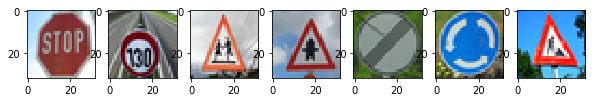

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv

index_to_name = {}
with open('signnames.csv', mode='r') as f:
    reader = csv.DictReader(f, delimiter=',')
    index_to_name = {int(row['ClassId']): row['SignName'] for row in reader}
    
test_images = {}
test_images_norm = {}

fig = plt.figure(figsize=(10,70))
ax = fig.add_subplot(171)
stop_img = Image.open('new_images/stop.jpg')
test_images["stop"] = stop_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["stop"])
test_images_norm["stop"] = normalize(test_images["stop"])

ax = fig.add_subplot(172)
speed_130_img = Image.open('new_images/speed_130.jpg')
test_images["speed_130"] = speed_130_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["speed_130"])
test_images_norm["speed_130"] = normalize(test_images["speed_130"])

ax = fig.add_subplot(173)
pedestrians_img = Image.open('new_images/crossing.jpg')
test_images["pedestrians"] = pedestrians_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["pedestrians"])
test_images_norm["pedestrians"] = normalize(test_images["pedestrians"])

ax = fig.add_subplot(174)
intersect_img = Image.open('new_images/intersect.jpg')
test_images["intersect"] = intersect_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["intersect"])
test_images_norm["intersect"] = normalize(test_images["intersect"])

ax = fig.add_subplot(175)
end_speed_img = Image.open('new_images/end_speed.jpg')
test_images["end_speed"] = end_speed_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["end_speed"])
test_images_norm["end_speed"] = normalize(test_images["end_speed"])

ax = fig.add_subplot(176)
round_img = Image.open('new_images/roundabout.jpg')
test_images["round"] = round_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["round"])
test_images_norm["round"] = normalize(test_images["round"])

ax = fig.add_subplot(177)
work_img = Image.open('new_images/work.jpg')
test_images["work"] = work_img.resize((32,32), Image.ANTIALIAS)
ax.imshow(test_images["work"])
test_images_norm["work"] = normalize(test_images["work"])

plt.show()

### Predict the Sign Type for Each Image

In [33]:
def top_k(X, k):
    logits_ensemble = []
    
    saver_lenet.restore(sess, "lenet")
    pred_lenet = predict_logits(X, logits_lenet)
    logits_ensemble.append(pred_lenet)
    
    saver_bn.restore(sess, "bn")
    pred_bn = predict_logits(X, logits_bn)
    logits_ensemble.append(pred_bn)
    
    saver_vgg.restore(sess, "vgg")
    pred_vgg = predict_logits(X, logits_vgg)
    logits_ensemble.append(pred_vgg)
    
    sum_logits = np.sum(logits_ensemble, axis=1)[0]
    
    softmax_ensemble = tf.nn.softmax(sum_logits)
    return sess.run(tf.nn.top_k(softmax_ensemble, k))
    

with tf.Session() as sess:
    for name, image in test_images_norm.items():
        _label = top_k([image], 1).indices[0]
        print("{} image classified as [{}]".format(name, index_to_name[_label]))

round image classified as [Roundabout mandatory]
intersect image classified as [Right-of-way at the next intersection]
speed_130 image classified as [No entry]
stop image classified as [Stop]
pedestrians image classified as [Children crossing]
end_speed image classified as [End of all speed and passing limits]
work image classified as [Road work]


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In the example images, the model is correctly classifying all signs that belong to a class that we trained our models for (100% accuracy). Out of curiosity I added an image that didn't have training data (Speed limit (130km/h)), which was not classified correctly (obviously!), and that the model classified as "End of no passing"; I was hoping for the model to classify it as the closest class (Speed limit (120km/h)) but the mistake is, in some sense, understandable. This also implies that generalizacion for new classes is more complex than this simple models used.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

	1.000 		 End of all speed and passing limits
	0.000 		 End of no passing
	0.000 		 End of speed limit (80km/h)
	0.000 		 End of no passing by vehicles over 3.5 metric tons
	0.000 		 Keep left


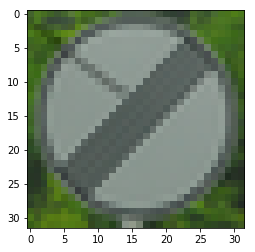

In [35]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def print_top(name, image):   
        _top = top_k([image], 5)
        _prob = _top.values
        _labels = _top.indices
        for i in range(0, 5):
            print("\t{:.3f} \t\t {}".format(_prob[i], index_to_name[_labels[i]]))

name = "end_speed"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)


	1.000 		 Right-of-way at the next intersection
	0.000 		 Speed limit (20km/h)
	0.000 		 Speed limit (30km/h)
	0.000 		 Speed limit (50km/h)
	0.000 		 Speed limit (60km/h)


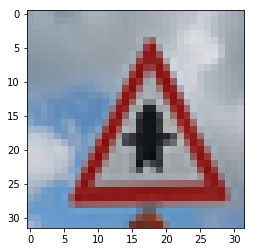

In [175]:
name = "intersect"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

	1.000 		 Road work
	0.000 		 Speed limit (20km/h)
	0.000 		 Speed limit (30km/h)
	0.000 		 Speed limit (50km/h)
	0.000 		 Speed limit (60km/h)


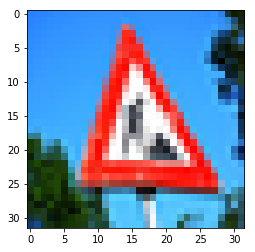

In [176]:
name = "work"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

	1.000 		 Roundabout mandatory
	0.000 		 Turn left ahead
	0.000 		 Speed limit (20km/h)
	0.000 		 Speed limit (30km/h)
	0.000 		 Speed limit (50km/h)


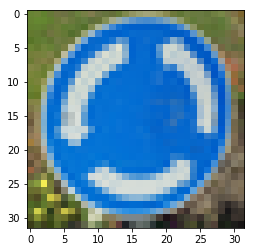

In [36]:
name = "round"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

	1.000 		 Stop
	0.000 		 Speed limit (30km/h)
	0.000 		 No entry
	0.000 		 Speed limit (20km/h)
	0.000 		 Speed limit (50km/h)


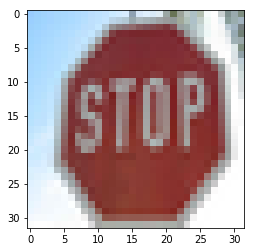

In [178]:
name = "stop"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

	1.000 		 Children crossing
	0.000 		 Road narrows on the right
	0.000 		 Bicycles crossing
	0.000 		 Bumpy road
	0.000 		 Slippery road


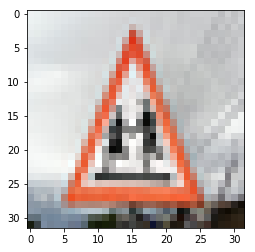

In [179]:
name = "pedestrians"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

	1.000 		 End of no passing
	0.000 		 Slippery road
	0.000 		 Turn left ahead
	0.000 		 Ahead only
	0.000 		 Roundabout mandatory


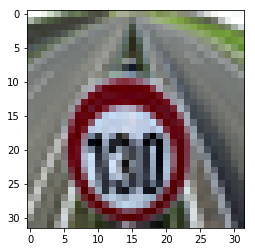

In [180]:
name = "speed_130"
image = np.array(test_images[name])
plt.figure()
plt.imshow(image)
with tf.Session() as sess: 
    print_top(name, image)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [183]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")